In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from datetime import datetime, timedelta

In [116]:
df = pd.read_csv("Road_Weather_Information_Stations.csv")


In [117]:
df.head()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:46:00 AM,6444193,47.22,47.22
1,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:47:00 AM,6444194,47.22,47.22
2,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:48:00 AM,6444195,47.22,47.22
3,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:49:00 AM,6444196,47.22,47.22
4,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:50:00 AM,6444197,47.22,47.22


In [118]:
df.tail()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
14060,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:56:00 AM,6394269,50.49,47.67
14061,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:57:00 AM,6394270,50.48,47.65
14062,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:58:00 AM,6394271,50.47,47.65
14063,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:59:00 AM,6394272,50.46,47.65
14064,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 01:00:00 AM,6394273,50.46,47.65


In [119]:
df.isnull().sum()

StationName               0
StationLocation           0
DateTime                  0
RecordId                  0
RoadSurfaceTemperature    0
AirTemperature            0
dtype: int64

In [120]:
df.describe()

,RecordId,RoadSurfaceTemperature,AirTemperature
count,1.406500e+04,14065.000000,14065.00000
mean,4.817993e+06,48.778478,47.27448
std,1.727984e+06,2.636119,1.92964
min,1.697775e+06,43.280000,43.30000
25%,3.322578e+06,47.220000,45.74000
50%,4.700317e+06,48.820000,47.26000
75%,6.425212e+06,49.990000,48.49000
max,6.445467e+06,59.260000,54.54000


In [121]:
df.shape

(14065, 6)

In [122]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

C:\Users\hp\AppData\Local\Temp\ipykernel_19232\1330258622.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [123]:
label_encoder = LabelEncoder()
df['StationName'] = label_encoder.fit_transform(df['StationName'])

In [124]:
feature_columns = ['StationName', 'AirTemperature', 'Year', 'Month', 'Day', 'Hour']
X = df[feature_columns]
y = df['RoadSurfaceTemperature']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
def calculate_accuracy(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  
    accuracy = 100 - mape  
    return accuracy

In [127]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [128]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [129]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [130]:
y_train_pred_rf = rf_model.predict(X_train)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_rf)
train_accuracy_rf = calculate_accuracy(y_train, y_train_pred_rf)
test_accuracy_rf = calculate_accuracy(y_test, y_pred_rf)

In [131]:
y_train_pred_xgb = xgb_model.predict(X_train)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_pred_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
train_accuracy_xgb = calculate_accuracy(y_train, y_train_pred_xgb)
test_accuracy_xgb = calculate_accuracy(y_test, y_pred_xgb)

In [132]:
y_train_pred_gb = gb_model.predict(X_train)
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_pred_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_pred_gb)
train_accuracy_gb = calculate_accuracy(y_train, y_train_pred_gb)
test_accuracy_gb = calculate_accuracy(y_test, y_pred_gb)

In [133]:
future_dates = [datetime.now() + timedelta(days=i) for i in range(1, 8)]
future_df = pd.DataFrame({
    'StationName': [df['StationName'].mode()[0]] * 7,
    'AirTemperature': [df['AirTemperature'].mean()] * 7,
    'Year': [date.year for date in future_dates],
    'Month': [date.month for date in future_dates],
    'Day': [date.day for date in future_dates],
    'Hour': [12] * 7
})

In [134]:
model_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting"],
    "Train R² Score": [train_r2_rf, train_r2_xgb, train_r2_gb],
    "Test R² Score": [test_r2_rf, test_r2_xgb, test_r2_gb],
    "Train MAE": [train_mae_rf, train_mae_xgb, train_mae_gb],
    "Test MAE": [test_mae_rf, test_mae_xgb, test_mae_gb],
    "Train Accuracy (%)": [train_accuracy_rf, train_accuracy_xgb, train_accuracy_gb],
    "Test Accuracy (%)": [test_accuracy_rf, test_accuracy_xgb, test_accuracy_gb]
}).sort_values(by="Test R² Score", ascending=False)

print("\nModel Training and Test Accuracy Comparison:")
print(model_results)


Model Training and Test Accuracy Comparison:
               Model  Train R² Score  Test R² Score  Train MAE  Test MAE  \
1            XGBoost        0.996497       0.995333   0.104029  0.110968   
0      Random Forest        0.999485       0.994690   0.026428  0.054119   
2  Gradient Boosting        0.966651       0.962212   0.332000  0.349579   

   Train Accuracy (%)  Test Accuracy (%)  
1           99.785075          99.771905  
0           99.945858          99.890326  
2           99.322826          99.290007  


In [135]:
best_model = xgb_model  
y_pred_best = y_pred_xgb

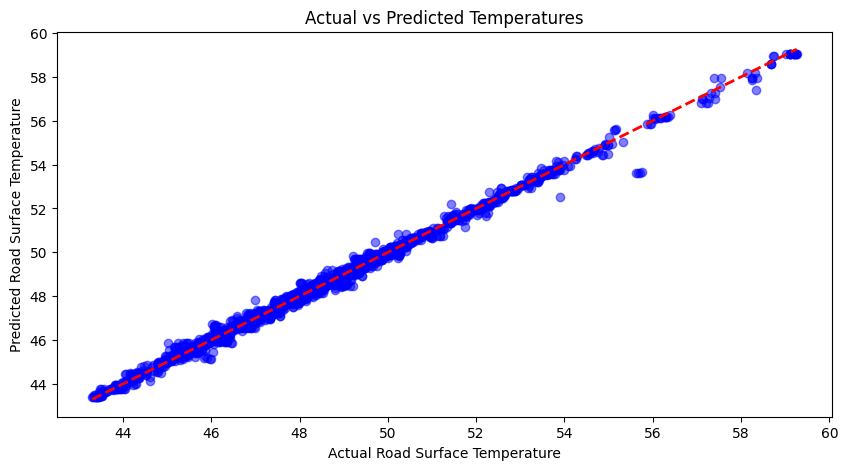

In [136]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_best, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Road Surface Temperature")
plt.ylabel("Predicted Road Surface Temperature")
plt.title("Actual vs Predicted Temperatures")
plt.show()

In [137]:
future_dates = [datetime.now() + timedelta(days=i) for i in range(1, 8)]
future_df = pd.DataFrame({
    'StationName': [df['StationName'].mode()[0]] * 7,
    'AirTemperature': [df['AirTemperature'].mean()] * 7,
    'Year': [date.year for date in future_dates],
    'Month': [date.month for date in future_dates],
    'Day': [date.day for date in future_dates],
    'Hour': [12] * 7
})

In [138]:
future_predictions = best_model.predict(future_df)
future_df['Predicted RoadSurfaceTemperature'] = future_predictions
print("\nNext Week's Temperature Predictions:")
print(future_df[['Year', 'Month', 'Day', 'Predicted RoadSurfaceTemperature']])


Next Week's Temperature Predictions:
   Year  Month  Day  Predicted RoadSurfaceTemperature
0  2025      3   23                         48.383469
1  2025      3   24                         48.383469
2  2025      3   25                         48.383469
3  2025      3   26                         48.383469
4  2025      3   27                         48.383469
5  2025      3   28                         48.383469
6  2025      3   29                         48.383469


In [139]:
total_stations = df['StationName'].nunique()
print("Total number of unique stations:", total_stations)

Total number of unique stations: 7


In [140]:
random_sample_size = 500  
random_sample = df.sample(n=random_sample_size, random_state=42)

In [141]:
X_random = random_sample[['StationName', 'AirTemperature', 'Year', 'Month', 'Day', 'Hour']]
y_random = random_sample['RoadSurfaceTemperature']

In [142]:
y_pred_random = best_model.predict(X_random)

In [143]:
random_r2 = r2_score(y_random, y_pred_random)
random_mae = mean_absolute_error(y_random, y_pred_random)

In [144]:
def calculate_accuracy(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  
    accuracy = 100 - mape  
    return accuracy

random_accuracy = calculate_accuracy(y_random, y_pred_random)

In [145]:
print(f"Random Sample ({random_sample_size} rows) Evaluation:")
print(f"R² Score: {random_r2:.4f}")
print(f"Mean Absolute Error (MAE): {random_mae:.4f}")
print(f"Accuracy: {random_accuracy:.2f}%")

Random Sample (500 rows) Evaluation:
R² Score: 0.9961
Mean Absolute Error (MAE): 0.1110
Accuracy: 99.77%


In [146]:
from sklearn.model_selection import KFold

In [147]:
feature_columns = ['StationName', 'AirTemperature', 'Year', 'Month', 'Day', 'Hour']
X = df[feature_columns]
y = df['RoadSurfaceTemperature']

In [148]:
def calculate_accuracy(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  
    return 100 - mape 

In [149]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [150]:
models = {'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
          'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
          'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)}

results = {model: {'R²': [], 'MAE': [], 'Accuracy': []} for model in models.keys()}

In [151]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[model_name]['R²'].append(r2_score(y_test, y_pred))
        results[model_name]['MAE'].append(mean_absolute_error(y_test, y_pred))
        results[model_name]['Accuracy'].append(calculate_accuracy(y_test, y_pred))

In [152]:
print("\nK-Fold Cross-Validation Results:")
for model_name in models.keys():
    print(f"\nModel: {model_name}")
    print(f"Avg R² Score: {np.mean(results[model_name]['R²']):.4f}")
    print(f"Avg MAE: {np.mean(results[model_name]['MAE']):.4f}")
    print(f"Avg Accuracy: {np.mean(results[model_name]['Accuracy']):.2f}%")


K-Fold Cross-Validation Results:

Model: Random Forest
Avg R² Score: 0.9973
Avg MAE: 0.0510
Avg Accuracy: 99.90%

Model: XGBoost
Avg R² Score: 0.9958
Avg MAE: 0.1108
Avg Accuracy: 99.77%

Model: Gradient Boosting
Avg R² Score: 0.9633
Avg MAE: 0.3430
Avg Accuracy: 99.30%


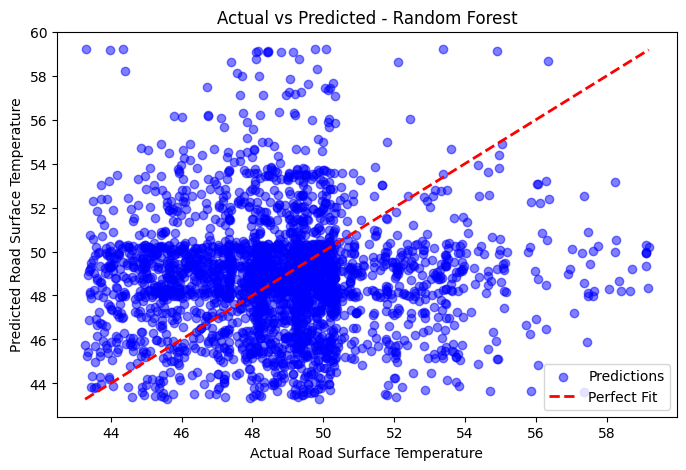

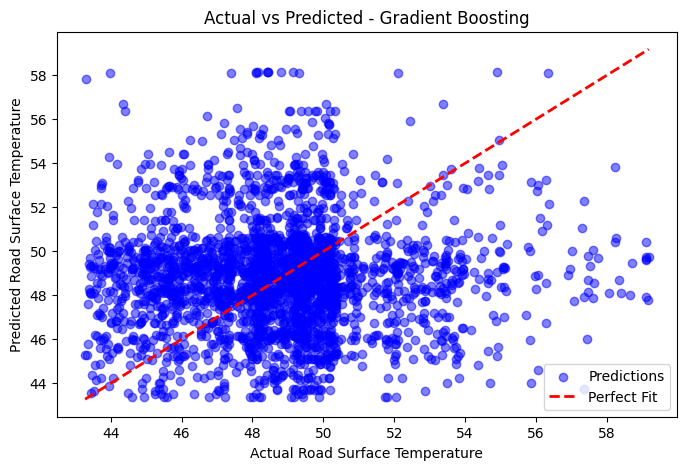

In [159]:
def plot_scatter(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predictions")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2, label="Perfect Fit")
    plt.xlabel("Actual Road Surface Temperature")
    plt.ylabel("Predicted Road Surface Temperature")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.legend()
    plt.show()
# Plot for Random Forest
plot_scatter(y_test, y_pred_rf, "Random Forest")

# Plot for Gradient Boosting
plot_scatter(y_test, y_pred_gb, "Gradient Boosting")

here this happens XG_boost is better because you can diffretiate by the scatter plot because the training and testing dataset it their is lot of diffrences we can see that in the random forest and gradient boosting.
We have to see whether model is not fitting in the other two except xg_boost.
